In [21]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_to_load = "./data/mouse_drug_data.csv"
clinical_trial_to_load = "./data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_to_load)
clinical_data = pd.read_csv(clinical_trial_to_load)

# Combine the data into a single dataset
combined = pd.merge(mouse_data,clinical_data,on='Mouse ID', how='outer')
combined = combined[['Mouse ID','Timepoint','Tumor Volume (mm3)','Metastatic Sites','Drug']]
combined['Tumor Volume (mm3)'] = round(combined['Tumor Volume (mm3)'],1)

# Display the data table for preview
combined.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,f234,0,45.0,0,Stelasyn
1,f234,5,47.3,0,Stelasyn
2,f234,10,47.9,0,Stelasyn
3,f234,15,48.7,1,Stelasyn
4,f234,20,51.1,2,Stelasyn


## Tumor Response to Treatment

In [22]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped = combined.groupby(['Drug','Timepoint'])
MeanTV = grouped['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
MeanTV_df = pd.DataFrame(MeanTV).reset_index()

# Preview DataFrame
MeanTV_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.268000
2,Capomulin,10,43.080000
3,Capomulin,15,42.066667
4,Capomulin,20,40.717391


In [23]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
SemTV = grouped['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
SemTV_df = pd.DataFrame(SemTV).reset_index()

# Preview DataFrame
SemTV_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.449137
2,Capomulin,10,0.704036
3,Capomulin,15,0.837107
4,Capomulin,20,0.908820


In [24]:
#For the error bars
SemTV_df = SemTV_df.pivot(index = 'Timepoint', columns='Drug')
SemTV_df.head()

Tumor Volume (mm3)                                          \
Drug               Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                              
0                   0.000000  0.000000  0.000000  0.000000  0.000000   
5                   0.449137  0.164096  0.235533  0.266584  0.201272   
10                  0.704036  0.234734  0.283339  0.356324  0.321307   
15                  0.837107  0.334288  0.352805  0.577249  0.444669   
20                  0.908820  0.356109  0.476416  0.725309  0.594510   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.216834  0.233172  0.485356  0.240175  0.189584  
10         0.400980  0.377399  0.719240  0.433280  0.263944  
15         0.612733  0.466272  0.770151  0.493940  0.367334  
20         0.839567  0.554597  0.787014  0.619751  0.533493

In [25]:
# Minor Data Munging to Re-Format the Data Frames
MeanTV_df = MeanTV_df.pivot(index='Timepoint', columns='Drug')

# Preview that Reformatting worked
MeanTV_df.head()

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.268000  46.504762  47.076000  47.400000  46.791304   
10                 43.080000  48.290000  49.409524  49.577273  48.700000   
15                 42.066667  50.089474  51.290476  52.400000  50.933333   
20                 40.717391  52.150000  53.195000  54.926316  53.640000   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.133333  47.256000  43.948000  47.528000  46.850000  
10         49.416667  49.095652  42.533333  49.465217  48.686364  
15         51.360000  51.070588  41.495833  51.534783  50.780952  
20         54.357895  53.341176  40.234783  54.076190  53.170588

In [26]:
MeanTV_df = MeanTV_df.reset_index()
SemTV_df = SemTV_df.reset_index()

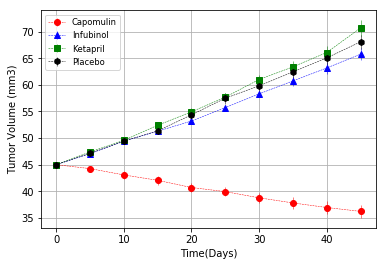

In [33]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots()

plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
ax.errorbar(MeanTV_df['Timepoint'], MeanTV_df['Tumor Volume (mm3)','Capomulin'],yerr = SemTV_df['Tumor Volume (mm3)','Capomulin'], color = 'r',marker = 'o',linewidth=0.5,linestyle='dashed',label='Capomulin')
ax.errorbar(MeanTV_df['Timepoint'], MeanTV_df['Tumor Volume (mm3)','Infubinol'], yerr = SemTV_df['Tumor Volume (mm3)','Infubinol'], color = 'b',marker = '^',linewidth=0.5,linestyle='dashed',label='Infubinol')
ax.errorbar(MeanTV_df['Timepoint'], MeanTV_df['Tumor Volume (mm3)','Ketapril'], yerr = SemTV_df['Tumor Volume (mm3)','Ketapril'], color = 'g',marker = 's',linewidth=0.5,linestyle='dashed',label='Ketapril')
ax.errorbar(MeanTV_df['Timepoint'], MeanTV_df['Tumor Volume (mm3)','Placebo'], yerr = SemTV_df['Tumor Volume (mm3)','Placebo'], color = 'k',marker = 'h',linewidth=0.5,linestyle='dashed',label='Placebo')
plt.grid()
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("../Images/drugtreatment1.png")


In [15]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [39]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
MeanMS = grouped['Metastatic Sites'].mean()

# Convert to DataFrame
MeanMS_df = pd.DataFrame(MeanMS).reset_index()

# Preview DataFrame
MeanMS_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [40]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
SemMS = grouped['Metastatic Sites'].sem()

# Convert to DataFrame
SemMS_df = pd.DataFrame(SemMS).reset_index()

# Preview DataFrame
SemMS_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [41]:
# Minor Data Munging to Re-Format the Data Frames
MeanMS_df = MeanMS_df.pivot(index='Timepoint', columns='Drug')

# Preview that Reformatting worked
MeanMS_df.head()



Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

In [42]:
# Minor Data Munging to Re-Format the Data Frames
SemMS_df = SemMS_df.pivot(index='Timepoint', columns='Drug')

# Preview that Reformatting worked
SemMS_df.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10                0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15                0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20                0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378

In [44]:
MeanMS_df = MeanMS_df.reset_index()
SemMS_df = SemMS_df.reset_index()

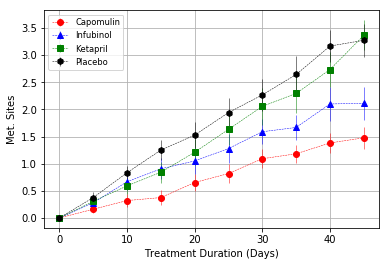

In [45]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots()
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
ax.errorbar(MeanMS_df['Timepoint'], MeanMS_df['Metastatic Sites','Capomulin'],yerr = SemMS_df['Metastatic Sites','Capomulin'], color = 'r',marker = 'o',linewidth=0.5,linestyle='dashed',label='Capomulin')
ax.errorbar(MeanMS_df['Timepoint'], MeanMS_df['Metastatic Sites','Infubinol'], yerr = SemMS_df['Metastatic Sites','Infubinol'], color = 'b',marker = '^',linewidth=0.5,linestyle='dashed',label='Infubinol')
ax.errorbar(MeanMS_df['Timepoint'], MeanMS_df['Metastatic Sites','Ketapril'], yerr = SemMS_df['Metastatic Sites','Ketapril'], color = 'g',marker = 's',linewidth=0.5,linestyle='dashed',label='Ketapril')
ax.errorbar(MeanMS_df['Timepoint'], MeanMS_df['Metastatic Sites','Placebo'], yerr = SemMS_df['Metastatic Sites','Placebo'], color = 'k',marker = 'h',linewidth=0.5,linestyle='dashed',label='Placebo')
plt.grid()
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("../Images/drugtreatment2.png")

## Survival Rates

In [61]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
CountM = grouped['Mouse ID'].count()

# Convert to DataFrame
CountM_df = pd.DataFrame(CountM).reset_index()

# Preview DataFrame
CountM_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [62]:
# Minor Data Munging to Re-Format the Data Frames
CountM_df = CountM_df.pivot(index='Timepoint', columns='Drug')

# Preview that Reformatting worked
CountM_df


Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   
25               22       18        18       19       18      17       14   
30               22       16        17       18       15      15       13   
35               22       14        12       17       15      14       10   
40               21       14        10       15       15      12        9   
45               21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

In [52]:
CountM_df = CountM_df.reset_index()

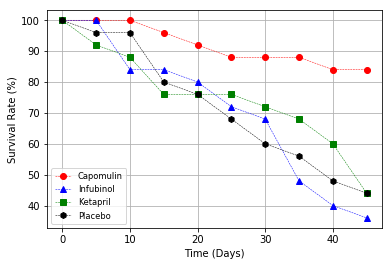

In [58]:
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots()
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
ax.errorbar(CountM_df['Timepoint'], CountM_df['Mouse ID','Capomulin']/25*100, color = 'r',marker = 'o',linewidth=0.5,linestyle='dashed',label='Capomulin')
ax.errorbar(CountM_df['Timepoint'], CountM_df['Mouse ID','Infubinol']/25*100, color = 'b',marker = '^',linewidth=0.5,linestyle='dashed',label='Infubinol')
ax.errorbar(CountM_df['Timepoint'], CountM_df['Mouse ID','Ketapril']/25*100, color = 'g',marker = 's',linewidth=0.5,linestyle='dashed',label='Ketapril')
ax.errorbar(CountM_df['Timepoint'], CountM_df['Mouse ID','Placebo']/25*100, color = 'k',marker = 'h',linewidth=0.5,linestyle='dashed',label='Placebo')
plt.grid()
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("../Images/drugtreatment3.png")
# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [89]:
# Calculate the percent changes for each drug
Initial = MeanTV_df.loc[0,['Tumor Volume (mm3)']]/45*100
Final = MeanTV_df.loc[9,['Tumor Volume (mm3)']]/45*100
Change = round(Final - Initial,2)

# Display the data to confirm
Change

                    Drug     
Tumor Volume (mm3)  Capomulin   -19.48
                    Ceftamin     42.48
                    Infubinol    46.12
                    Ketapril     57.05
                    Naftisol     53.95
                    Placebo      51.27
                    Propriva     47.27
                    Ramicane    -22.31
                    Stelasyn     52.08
                    Zoniferol    46.57
dtype: float64

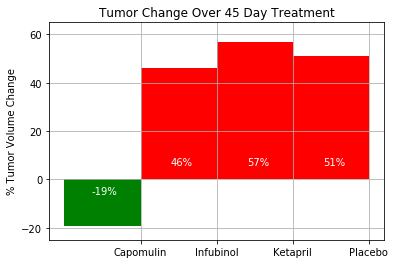

In [181]:
# Store all Relevant Percent Changes into a Tuple
Changes = (-19.48,46.12,57.05,51.27)
Changes

# Splice the data between passing and failing drugs
bins = [-100,0,100]
group_names = ['success','fail']
Changes_categories = pd.cut(Changes,bins,labels=group_names)
Changes_categories

# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots()
x_axis = np.arange(len(Changes))
ax.bar(x_axis,Changes,color=['g', 'r', 'r', 'r'],align='edge',width=-1)
tick_locations = [value for value in x_axis] 
xmajor_ticks = np.arange(0,4,1)
ymajor_ticks = np.arange(-20,80,20)
ax.set_xticks(xmajor_ticks)
ax.set_yticks(ymajor_ticks)
ax.set_xticklabels(["Capomulin", "Infubinol", "Ketapril", "Placebo"],rotation="horizontal")
ax.grid(which='major')
plt.xlim(-1.2, 3.2)
plt.ylim(-25,65)

plt.ylabel("% Tumor Volume Change")
plt.title('Tumor Change Over 45 Day Treatment')

# Use functions to label the percentages of changes
ax.text(-0.65,-6,s = '-19%',color='w')
ax.text(0.4,6,s = '46%',color='w')
ax.text(1.4,6,s = '57%',color='w')
ax.text(2.4,6,s = '51%',color='w')

# Save the Figure
plt.savefig("../Images/drugtreatment4.png")

# Show the Figure
plt.show()